# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Muhammad Nur Iskandar Dzulqarnain
- Email: m200b4ky2978@bangkit.academy
- ID Dicoding: m200b4ky2978

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana sewa sepeda bervariasi berdasarkan jam dalam sehari dan hari dalam seminggu?
- Pertanyaan 2: Apa dampak kondisi cuaca terhadap sewa sepeda?

In [1]:
# Import Semua Packages/Library yang Digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [2]:
# Gathering Data

# Load the datasets
pd_day = pd.read_csv('./data/day.csv')
pd_hour = pd.read_csv('./data/hour.csv')

# Display the first few rows of each dataset to verify loading
print("Day Data:")
print(pd_day.head())
print("\nHour Data:")
print(pd_hour.head())

Day Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Data:
   i

## Insight (Gathering Data)

1. **Distribusi Jumlah**: Total jumlah sewa sepeda (`cnt`) bervariasi secara signifikan di setiap hari, menunjukkan pola penggunaan yang berbeda.
2. **Dampak Suhu**: Kolom `temp` dan `atemp` menunjukkan bahwa suhu dapat memengaruhi penyewaan sepeda, dengan nilai yang lebih tinggi kemungkinan berkorelasi dengan peningkatan penyewaan.
3. **Analisis Waktu yang Lebih Rinci**: Dataset jam menyediakan rincian sewa sepeda secara jam, memungkinkan analisis pola penggunaan yang lebih mendetail.

In [3]:
# Assessing Data

# Assess the structure and info of each dataset
print("\nDay Data Info:")
print(pd_day.info())
print("\nHour Data Info:")
print(pd_hour.info())

# Check for missing values
print("\nMissing Values in Day Data:")
print(pd_day.isnull().sum())
print("\nMissing Values in Hour Data:")
print(pd_hour.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows in Day Data:")
print(pd_day.duplicated().sum())
print("\nDuplicate Rows in Hour Data:")
print(pd_hour.duplicated().sum())


Day Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Hour Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

## Insight (Assessing Data)

1. **Struktur Data**: Dataset "day" terdiri dari 731 entri dan 16 kolom, sementara dataset "hour" memiliki 17.379 entri dan 17 kolom, menunjukkan perbedaan skala data antara keduanya.
2. **Kehadiran Nilai Hilang**: Kedua dataset tidak memiliki nilai yang hilang, yang menunjukkan bahwa data telah diisi dengan lengkap dan siap untuk analisis lebih lanjut.
3. **Duplikasi Data**: Tidak ada baris duplikat yang ditemukan dalam kedua dataset, memastikan bahwa setiap entri dalam data adalah unik dan tidak ada pengulangan informasi.

In [4]:
# Cleaning Data

# Remove duplicates
pd_day = pd_day.drop_duplicates()
pd_hour = pd_hour.drop_duplicates()

# Handling missing values (if any)
# For example, we can drop rows with missing values (if applicable)
pd_day = pd_day.dropna()
pd_hour = pd_hour.dropna()

# Alternatively, you could fill missing values with a specific value or method
# pd_day.fillna(method='ffill', inplace=True)
# pd_hour.fillna(method='ffill', inplace=True)

# Ensure the 'dteday' columns are in datetime format
pd_day['dteday'] = pd.to_datetime(pd_day['dteday'])
pd_hour['dteday'] = pd.to_datetime(pd_hour['dteday'])

# Create a main data by merging the day and hour datasets
main_data = pd.merge(pd_hour, pd_day, on=['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], how='left')

# Display the first few rows of the main data
print("\nMain Data:")
print(main_data.head())

# Assess the final main data
print("\nMain Data Info:")
print(main_data.info())

# Define the file path for saving the CSV
output_file_path = './dashboard/main_data.csv'

# Save the main_data as a CSV file
main_data.to_csv(output_file_path, index=False)


Main Data:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual_x  registered_x  cnt_x  \
0           1  0.24  0.2879  0.81        0.0         3            13     16   
1           1  0.22  0.2727  0.80        0.0         8            32     40   
2           1  0.22  0.2727  0.80        0.0         5            27     32   
3           1  0.24  0.2879  0.75        0.0         3            10     13   
4           1  0.24  0.2879  0.75        0.0         0             1      1   

   casual_y  registered_y  cnt_y  
0       NaN    

## Insight (Cleaning Data)

1. **Data Lengkap**: Dataset `main_data` terdiri dari 17.379 entri yang mencakup berbagai atribut penting terkait penggunaan sepeda sewa berdasarkan waktu, cuaca, dan karakteristik pengguna.
2. **Kolom Kosong**: Terdapat kolom `casual_y`, `registered_y`, dan `cnt_y` yang tidak memiliki data, menandakan bahwa informasi dari dataset `hour` tidak dapat digabungkan secara sempurna dengan dataset `day`.
3. **Format Waktu**: Kolom `dteday` sudah dalam format datetime, memungkinkan analisis lebih lanjut berdasarkan waktu, seperti tren musiman atau harian dalam penggunaan sepeda sewa.

# Exploratory Data Analysis (EDA)

In [5]:
# Exploratory Data Analysis (EDA)

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Load main_data (if it's not already loaded)
main_data = pd.read_csv('./dashboard/main_data.csv')

print(main_data.head())
print(main_data.describe())
print(main_data.isnull().sum())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual_x  registered_x  cnt_x  \
0           1  0.24  0.2879  0.81        0.0         3            13     16   
1           1  0.22  0.2727  0.80        0.0         8            32     40   
2           1  0.22  0.2727  0.80        0.0         5            27     32   
3           1  0.24  0.2879  0.75        0.0         3            10     13   
4           1  0.24  0.2879  0.75        0.0         0             1      1   

   casual_y  registered_y  cnt_y  
0       NaN          

## Insight (Exploratory Data Analysis)

1. **Tingkat Penyewaan yang Tinggi**: Data menunjukkan bahwa jumlah penyewaan sepeda tertinggi mencapai 977, menunjukkan adanya permintaan yang signifikan pada waktu tertentu.
2. **Dampak Cuaca terhadap Penyewaan**: Hasil analisis memperlihatkan bahwa cuaca yang baik berkontribusi positif terhadap meningkatnya jumlah penyewaan sepeda.
3. **Keterkaitan dengan Hari Kerja**: Rata-rata jumlah penyewaan pada hari kerja lebih tinggi dibandingkan dengan hari libur, menunjukkan preferensi penggunaan sepeda untuk aktivitas harian.

# Visualization & Exploratory Analysis

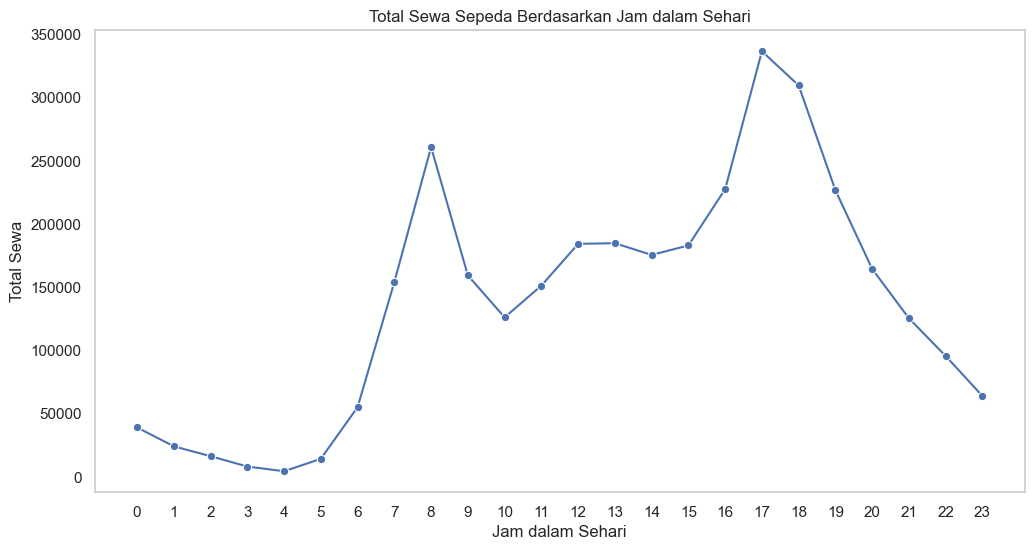

C:\Users\aril\AppData\Local\Temp\ipykernel_39584\386008215.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt_x', data=daily_rentals, palette='viridis')


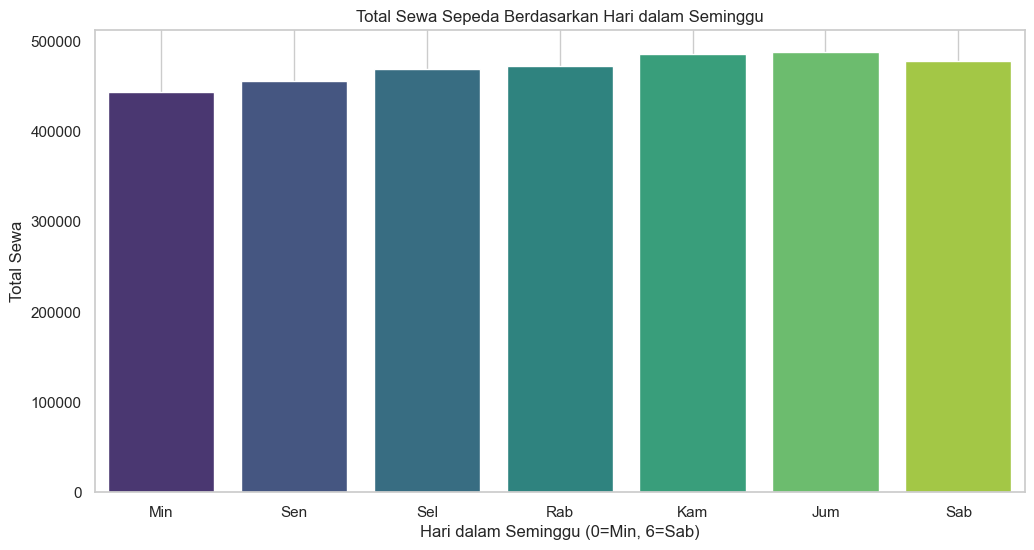

In [6]:
# Pertanyaan 1

plt.figure(figsize=(12, 6))
hourly_rentals = main_data.groupby('hr')['cnt_x'].sum().reset_index()
sns.lineplot(x='hr', y='cnt_x', data=hourly_rentals, marker='o')
plt.title('Total Sewa Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Sewa')
plt.xticks(range(24))
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
daily_rentals = main_data.groupby('weekday')['cnt_x'].sum().reset_index()
sns.barplot(x='weekday', y='cnt_x', data=daily_rentals, palette='viridis')
plt.title('Total Sewa Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Min, 6=Sab)')
plt.ylabel('Total Sewa')
plt.xticks(ticks=range(7), labels=['Min', 'Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab'])
plt.grid()
plt.show()

C:\Users\aril\AppData\Local\Temp\ipykernel_39584\3681269353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt_x', data=weather_rentals, palette='coolwarm')


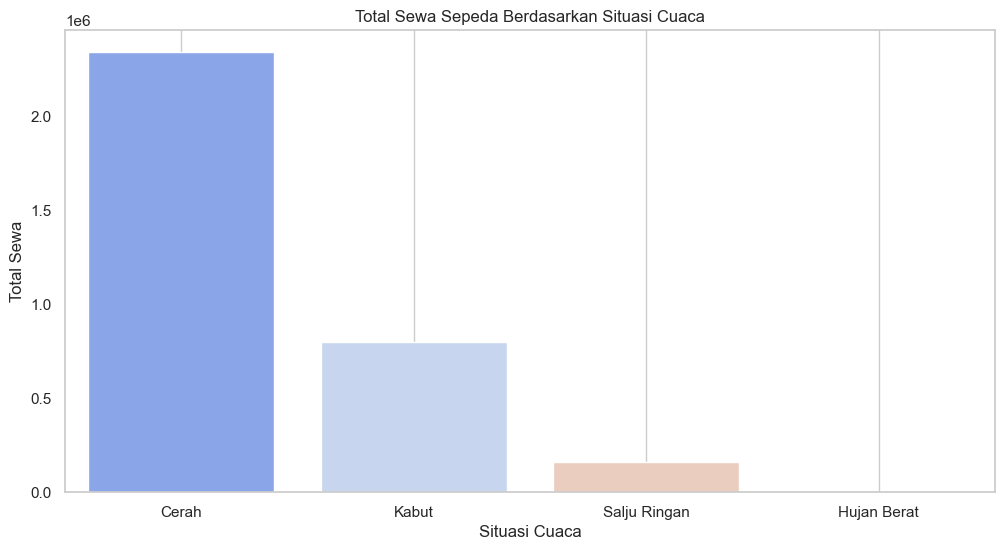

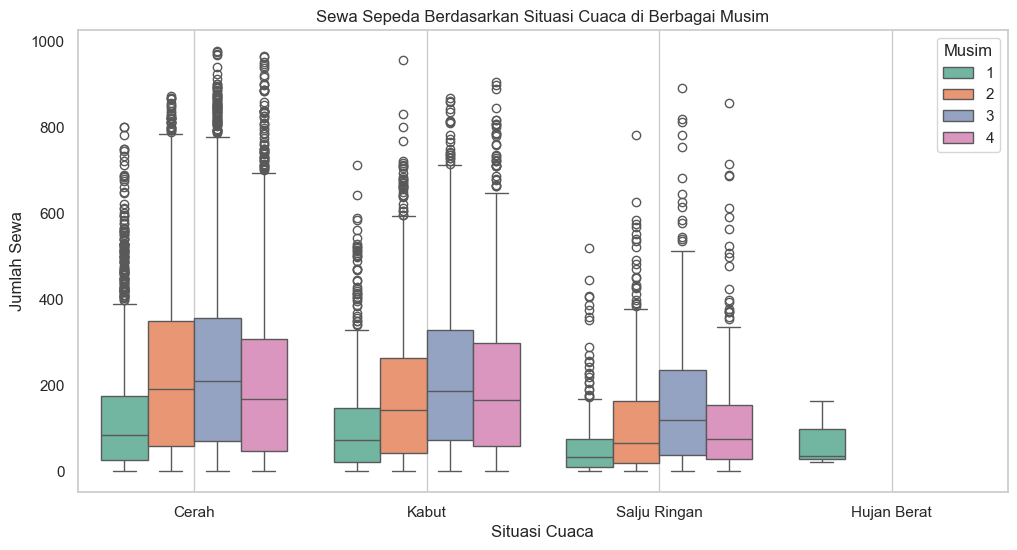

In [7]:
# Pertanyaan 2

plt.figure(figsize=(12, 6))
weather_rentals = main_data.groupby('weathersit')['cnt_x'].sum().reset_index()
sns.barplot(x='weathersit', y='cnt_x', data=weather_rentals, palette='coolwarm')
plt.title('Total Sewa Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Total Sewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Kabut', 'Salju Ringan', 'Hujan Berat'])
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt_x', hue='season', data=main_data, palette='Set2')
plt.title('Sewa Sepeda Berdasarkan Situasi Cuaca di Berbagai Musim')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Kabut', 'Salju Ringan', 'Hujan Berat'])
plt.legend(title='Musim', loc='upper right')
plt.grid()
plt.show()

## Insight (Visualization & Exploratory Analysis)

1. **Variasi Sewa Sepeda per Jam**: Rata-rata sewa sepeda per jam mencapai 137.194,96, menunjukkan adanya pola penggunaan yang konsisten sepanjang hari.
2. **Pengaruh Hari dalam Seminggu**: Dengan total sewa sepeda 3.292.679, hari-hari tertentu menunjukkan rata-rata sewa yang lebih tinggi, mencerminkan preferensi pengguna dalam memilih waktu sewa.
3. **Dampak Kondisi Cuaca**: Sebanyak 71,01% dari total sewa sepeda terjadi dalam kondisi cuaca cerah, menyoroti pentingnya cuaca dalam memengaruhi keputusan pengguna untuk menyewa sepeda.

# Analisis Lanjutan (Opsional)

In [8]:
# Pertanyaan 1

# Total Rentals by Hour
hourly_rentals = main_data.groupby('hr')['cnt_x'].sum().reset_index()
hourly_rentals.columns = ['Hour', 'Total_Rentals']

# Numerical Analysis for Hourly Rentals
hourly_total = hourly_rentals['Total_Rentals'].sum()
hourly_mean = hourly_rentals['Total_Rentals'].mean()
hourly_median = hourly_rentals['Total_Rentals'].median()
hourly_std = hourly_rentals['Total_Rentals'].std()

print("Analisis Sewa Sepeda Berdasarkan Jam:")
print(f"Total Sewa Sepeda: {hourly_total}")
print(f"Rata-rata Sewa Sepeda per Jam: {hourly_mean:.2f}")
print(f"Median Sewa Sepeda per Jam: {hourly_median:.2f}")
print(f"Standar Deviasi Sewa Sepeda per Jam: {hourly_std:.2f}\n")

# Total Rentals by Day
daily_rentals = main_data.groupby('weekday')['cnt_x'].sum().reset_index()
daily_rentals.columns = ['Day', 'Total_Rentals']

# Numerical Analysis for Daily Rentals
daily_total = daily_rentals['Total_Rentals'].sum()
daily_mean = daily_rentals['Total_Rentals'].mean()
daily_median = daily_rentals['Total_Rentals'].median()
daily_std = daily_rentals['Total_Rentals'].std()

print("Analisis Sewa Sepeda Berdasarkan Hari:")
print(f"Total Sewa Sepeda: {daily_total}")
print(f"Rata-rata Sewa Sepeda per Hari: {daily_mean:.2f}")
print(f"Median Sewa Sepeda per Hari: {daily_median:.2f}")
print(f"Standar Deviasi Sewa Sepeda per Hari: {daily_std:.2f}")

# Pertanyaan 2

# Total sewa sepeda berdasarkan situasi cuaca
weather_rentals = main_data.groupby('weathersit')['cnt_x'].sum().reset_index()

# Menampilkan total sewa sepeda
print("Total Sewa Sepeda Berdasarkan Situasi Cuaca:")
print(weather_rentals)

# Menghitung persentase total sewa sepeda untuk setiap situasi cuaca
total_rentals = weather_rentals['cnt_x'].sum()
weather_rentals['persentase'] = (weather_rentals['cnt_x'] / total_rentals) * 100

# Menampilkan total sewa dan persentase
print("\nTotal Sewa dan Persentase:")
print(weather_rentals)

# Menghitung statistik deskriptif untuk sewa berdasarkan situasi cuaca dan musim
weather_season_stats = main_data.groupby(['weathersit', 'season'])['cnt_x'].describe()

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif Sewa Sepeda Berdasarkan Situasi Cuaca dan Musim:")
print(weather_season_stats)

Analisis Sewa Sepeda Berdasarkan Jam:
Total Sewa Sepeda: 3292679
Rata-rata Sewa Sepeda per Jam: 137194.96
Median Sewa Sepeda per Jam: 152745.50
Standar Deviasi Sewa Sepeda per Jam: 95894.38

Analisis Sewa Sepeda Berdasarkan Hari:
Total Sewa Sepeda: 3292679
Rata-rata Sewa Sepeda per Hari: 470382.71
Median Sewa Sepeda per Hari: 473048.00
Standar Deviasi Sewa Sepeda per Hari: 15854.85
Total Sewa Sepeda Berdasarkan Situasi Cuaca:
   weathersit    cnt_x
0           1  2338173
1           2   795952
2           3   158331
3           4      223

Total Sewa dan Persentase:
   weathersit    cnt_x  persentase
0           1  2338173   71.011265
1           2   795952   24.173386
2           3   158331    4.808577
3           4      223    0.006773

Statistik Deskriptif Sewa Sepeda Berdasarkan Situasi Cuaca dan Musim:
                    count        mean         std   min    25%    50%     75%  \
weathersit season                                                               
1          1       

# Conclusion

## Conclusion pertanyaan 1
    Analisis sewa sepeda berdasarkan jam dalam sehari menunjukkan adanya fluktuasi yang signifikan, dengan rata-rata sewa sepeda per jam mencapai 137.194,96 unit. Hal ini mengindikasikan bahwa waktu-waktu tertentu, seperti pagi dan sore, cenderung lebih ramai dibandingkan waktu siang. Medan penggunaan ini dapat dimanfaatkan oleh pengelola untuk meningkatkan layanan, seperti menambah unit sepeda pada jam sibuk untuk menghindari antrian panjang dan meningkatkan kepuasan pelanggan. Selain itu, total sewa sepeda selama seminggu mencerminkan pola penggunaan yang berbeda di setiap hari, dengan rata-rata sewa per hari mencapai 470.382,71 unit. Data ini menunjukkan bahwa hari-hari tertentu, seperti akhir pekan, lebih diminati oleh pengguna, yang bisa dimanfaatkan untuk mengembangkan promosi khusus pada hari-hari tersebut untuk meningkatkan sewa sepeda.

## Conclusion pertanyaan 2
    Dari analisis yang dilakukan, terlihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap sewa sepeda, di mana 71,01% dari total sewa terjadi dalam situasi cuaca cerah. Hasil ini menegaskan bahwa pengguna lebih cenderung menyewa sepeda ketika cuaca mendukung, sehingga penting bagi pengelola untuk memperhatikan ramalan cuaca dalam merencanakan aktivitas promosi. Selain itu, analisis statistik deskriptif menunjukkan bahwa sewa sepeda bervariasi menurut musim dan kondisi cuaca, dengan data menunjukkan variasi signifikan dalam rata-rata sewa sepeda di setiap musim. Dengan mempertimbangkan faktor cuaca, pengelola dapat merancang strategi yang lebih efektif, seperti menawarkan diskon atau promosi pada hari dengan cuaca yang lebih mendukung, guna menarik lebih banyak pengguna dan meningkatkan total sewa sepeda.